## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[[-0.94489518 -0.04344294  0.26258475 -0.142227   -0.14603083 -0.3031662
   0.26401818  0.40173613 -0.78481766  0.90830969]
 [ 0.50659088  0.11867912 -0.24260531  0.59825796 -0.46822731  0.27486968
  -0.57365876  0.55073584 -0.98839493 -0.73941636]
 [ 0.94829061 -0.95462312  0.3222118  -0.89936616  0.37129433 -0.36569949
   0.82537462 -0.27097238 -0.38523958 -0.83285525]
 [ 0.29452704 -0.28192988  0.69274425  0.17547233  0.55483667  0.07538201
   0.44594249 -0.57536963  0.79144782  0.02968504]
 [-0.16594154  0.68087743 -0.24284184  0.20472345  0.9840799   0.26650965
   0.9601946  -0.38811737  0.37626198  0.64971832]
 [-0.20367627  0.84403029 -0.74881297  0.2659783   0.05163502 -0.70056204
   0.22395303 -0.20818026  0.51111036 -0.10748495]
 [-0.03293116  0.05671237 -0.63808668 -0.11737776 -0.0944774   0.52427182
   0.10267865  0.59560149  0.62014443 -0.99531098]
 [ 0.32583515  0.89908707 -0.42000692  0.08771837 -0.25067564  0.36753694
  -0.79899262 -0.8374765  -0.68018571  0.60584274]
 

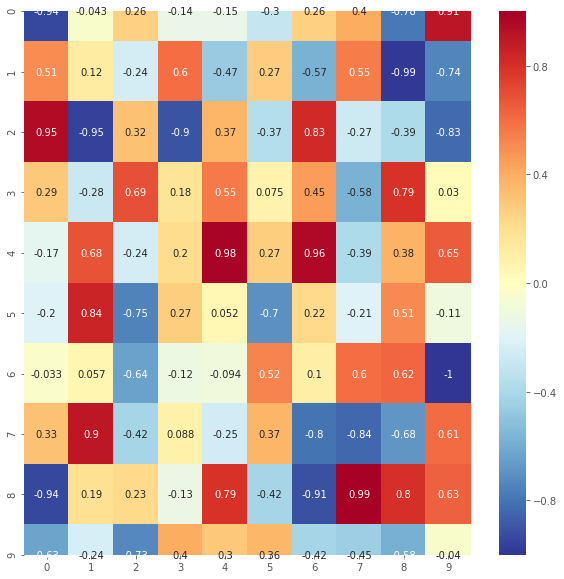

In [9]:
#1.請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
matrix = np.random.random(size=(10,10))*2-1
print(matrix)
plt.figure(figsize=(10,10))
"""
Your Code Here
"""
heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, 
            vmin = -1.0, annot = True, vmax = 1.0)

#heatmap = sns.heatmap(matrix.round(3),square=True,annot=True)

plt.show()

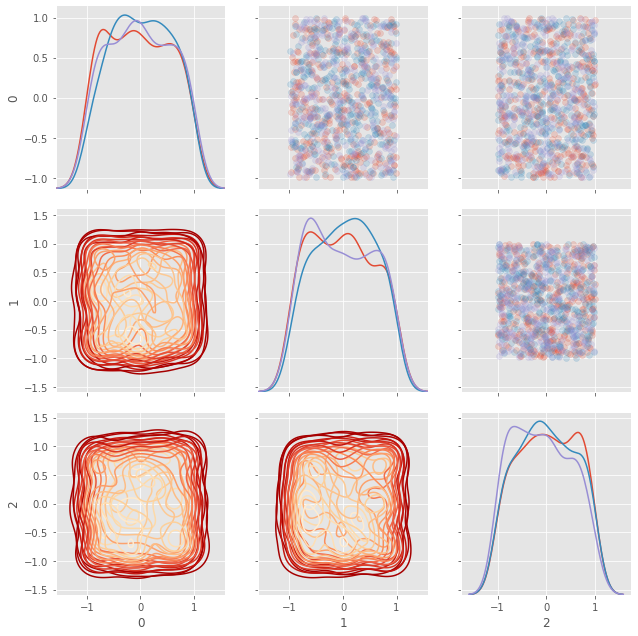

In [3]:
#2.請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，
#並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3
"""
Your Code Here
"""
matrix = 2* np.random.random(size=(nrow,ncol))-1

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow) #從a=[0,1,2]中隨機取元素填入
plot_data = pd.DataFrame(matrix, indice).reset_index() 
#reset_index() 重置DataFrame的索引，並使用默認索引。

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])

"""
vars的寫法會等於以下：
vars= []
for x in list(plot_data.columns):
    if x != 'index':
        vars.append(x)
"""

#繪出PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
"""
Your Code Here
Please replace "..." to correct plot function

g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);
"""
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()

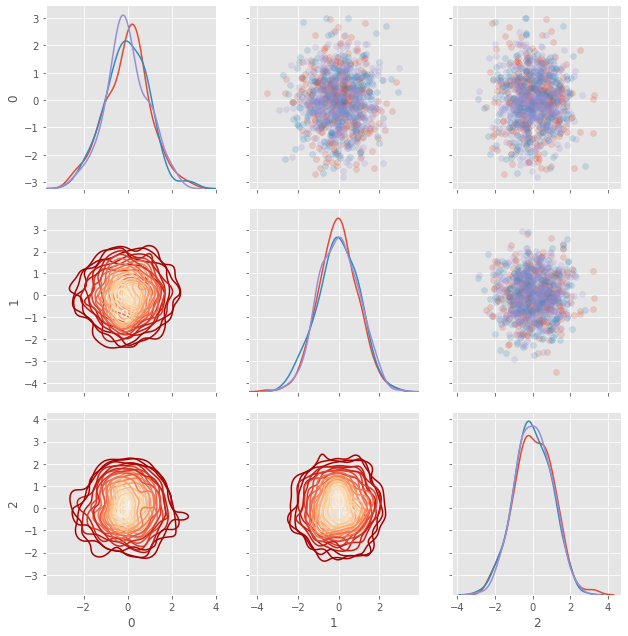

In [13]:
#請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，
#並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

nrow = 1000
ncol = 3
"""
Your Code Here
"""
#常態分佈randn
matrix = np.random.randn(nrow * ncol).reshape((nrow, ncol))
#np.random.randn從“標準正態”分佈中返回一個或多個樣本，
#所以要用reshape((nrow, ncol))，讓NumPy 陣列重塑形狀和調整大小

"""
#normal高斯分佈的概率密度
#其特徵形狀而通常被稱為鍾形曲線。
#matrix = np.random.normal(loc=0, scale=1, size=(nrow,ncol))
"""

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
plot_data = pd.DataFrame(matrix, indice).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
# 右上散佈圖, 對角線KDE, 左下density plot
grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.show()